In [154]:
# DATA INIT TEMPLATE
import pandas as pd

# call this anywhere to quickly check array index key/value pairs
def helper():
    print('----------------------')
    print('sequences array access:')
    print('sequences[x]')
    print('0  to 4  = A0-5')
    print('5  to 9  = B0-5')
    print('10 to 14 = C0-5')
    print('15 to 19 = D0-5')
    print('20 to 24 = E0-5')
    print()
    print('all data for tag[x]:')
    print('tags[0] = ankle_left')
    print('tags[1] = ankle_right')
    print('tags[2] = belt')
    print('tags[3] = chest')
    print('----------------------')


# df = pd.read_csv('data_edited.txt',sep=',')
df = pd.read_csv('data_edited_no_ss.txt', sep=',')
df = df.drop('timestamp', axis=1)

# array of unique sequence ids
seq_ids = []
for item in df['seq'].unique():
    seq_ids.append(item)

# array of unique activities
activities = []
for item in df['activity'].unique():
    activities.append(df.loc[df['activity'] == item])

# array of all 25 sequences
# eg: sequences[0] = the A01 sequence for all activities
sequences = []
for item in seq_ids:
    sequences.append(df.loc[df['seq'] == item])
   

# array of unique tags
tags = []
tags.append(df.loc[df['tag'] == 'ankle_left'])
tags.append(df.loc[df['tag'] == 'ankle_right'])
tags.append(df.loc[df['tag'] == 'belt'])
tags.append(df.loc[df['tag'] == 'chest'])

def reveal_guide():
    helper()

    # access chest sensor data for 'sitting' for ALL sequences
    print('chest sensor data for sitting for ALL sequences')
    print(tags[3].loc[df['activity'] == 'sitting'])
    print()

    # access all data for A05
    print('all data for A05')
    print(sequences[4])
    print()

    # get ankle_left data for A05 is sitting
    # eg. to profile a full body sensor data set for one person, per activity
    print('ankle_left data for A05 is sitting')
    print(sequences[4].loc[(df.activity == 'sitting') & (df.tag == 'ankle_left')])
    print()

# uncomment the functio call below to see helper print output
# reveal_guide()

----------------------
sequences array access:
sequences[x]
0  to 4  = A0-5
5  to 9  = B0-5
10 to 14 = C0-5
15 to 19 = D0-5
20 to 24 = E0-5

all data for tag[x]:
tags[0] = ankle_left
tags[1] = ankle_right
tags[2] = belt
tags[3] = chest
----------------------
chest sensor data for sitting for ALL sequences
        seq    tag      time     x_pos     y_pos     z_pos activity
179     A01  chest  14:03:31  2.867921  2.464025  0.991596  sitting
182     A01  chest  14:03:31  2.852450  2.590289  0.829808  sitting
186     A01  chest  14:03:31  2.861669  2.673411  0.868391  sitting
189     A01  chest  14:03:31  2.886472  2.579628  1.118681  sitting
193     A01  chest  14:03:31  2.896925  2.636818  0.962707  sitting
...     ...    ...       ...       ...       ...       ...      ...
161955  E05  chest  11:49:07  3.087344  1.227786  0.971560  sitting
161959  E05  chest  11:49:07  3.263002  1.381957  0.919570  sitting
161962  E05  chest  11:49:07  3.097599  1.239203  0.881021  sitting
161966  E05  

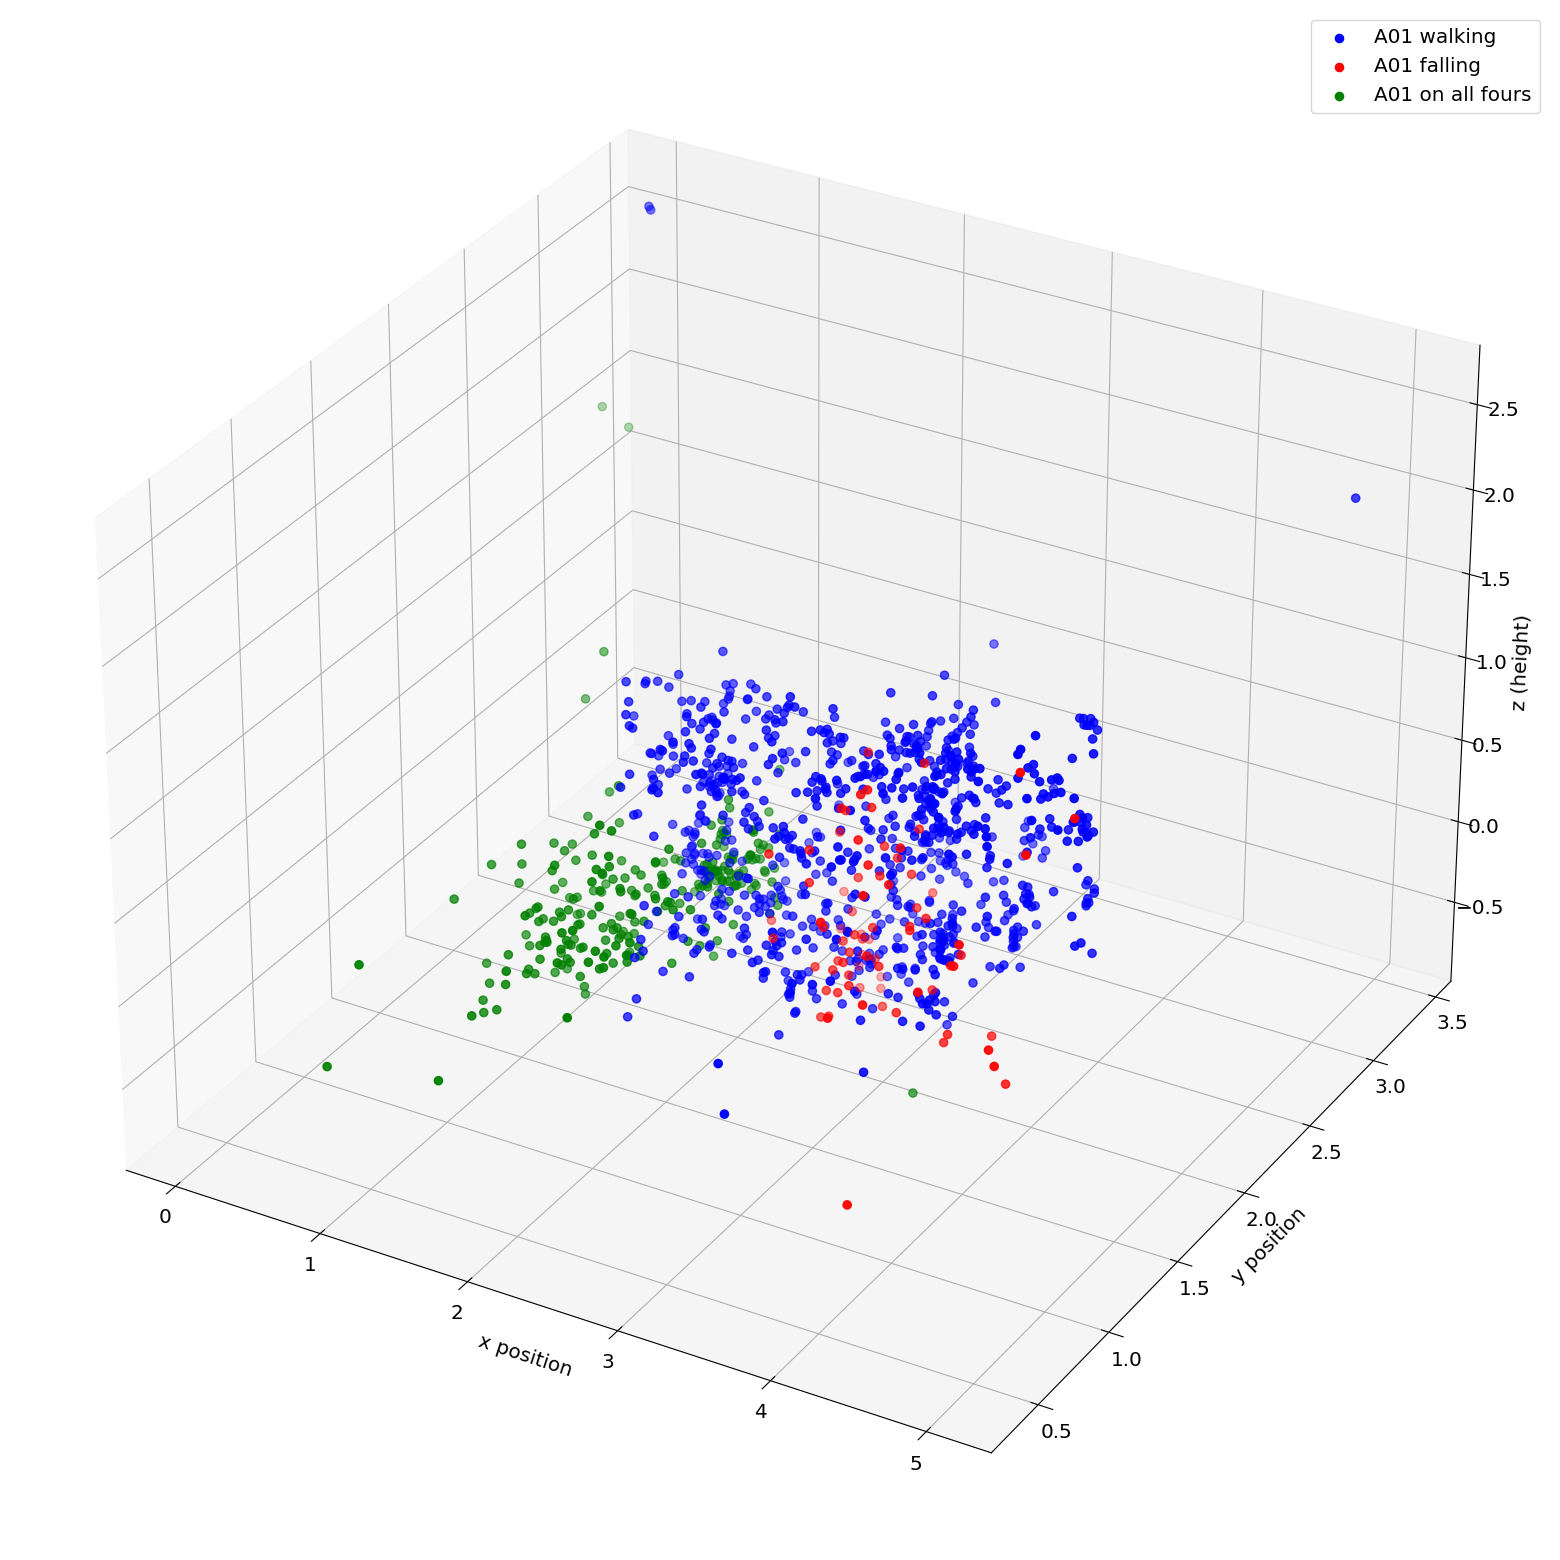

In [171]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large','figure.figsize': (20, 20),
         'axes.labelsize': 'x-large','xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

a01_walk = sequences[0].loc[(df.activity == 'walking')]
a01_fall = sequences[0].loc[(df.activity == 'falling')]
a01_on_all_fours = sequences[0].loc[(df.activity == 'on all fours')]

dot_size = 35
# scatterplot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(a01_walk.loc[:, 'x_pos'], a01_walk.loc[:, 'y_pos'], a01_walk.loc[:, 'z_pos'], c='b', s=dot_size, label='A01 walking', depthshade=True)
ax.scatter3D(a01_fall.loc[:, 'x_pos'], a01_fall.loc[:, 'y_pos'], a01_fall.loc[:, 'z_pos'], c='r', s=dot_size, label='A01 falling', depthshade=True)
ax.scatter3D(a01_on_all_fours.loc[:, 'x_pos'], a01_on_all_fours.loc[:, 'y_pos'], a01_on_all_fours.loc[:, 'z_pos'], c='g', s=dot_size, label='A01 on all fours', depthshade=True)

ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('z (height)')
plt.legend()
plt.show()
